In [1]:
import pandas as pd
import numpy as np
#import PI_client as pc
import matplotlib
import sklearn as sk
from sklearn import linear_model

In [3]:
# Reading in data, setting index
df = pd.read_csv('scc_data_to_use_normalized_features_removed.csv')
df.index = df.iloc[:,0]
df = df.drop(["Unnamed: 0"], axis=1)

In [4]:
# Splitting into training and testing sets
train = df.sample(frac=.7).copy()
test = df.drop(train.index).copy()

In [5]:
# Separating features from labels
col = df.columns
col = col[0:len(col)-1]

x_train = pd.DataFrame(index=train.index, data=train[col])
y_train= pd.DataFrame(index=train.index, data=train["Occupied"])

x_test = pd.DataFrame(index=test.index, data=test[col])
y_test= pd.DataFrame(index=test.index, data=test["Occupied"])

In [6]:
# Creating and training logistic regression model
mod = linear_model.LogisticRegression(solver="sag",max_iter=3000)
LR_model = mod.fit(x_train,y_train["Occupied"])

In [14]:
df

,AP Connection Count,Electricity Demand kBTU/h,Day of Week,Occupied
Unnamed: 0,,,,
6/1/18 12:00,0.648101,0.508301,0.666667,1
6/1/18 12:10,0.577215,0.495425,0.666667,1
6/1/18 12:20,0.506329,0.514953,0.666667,1
6/1/18 12:30,0.512658,0.464681,0.666667,1
6/1/18 12:40,0.517722,0.470615,0.666667,1
6/1/18 12:50,0.484810,0.488898,0.666667,1
6/1/18 13:00,0.464557,0.508465,0.666667,1
6/1/18 13:10,0.526582,0.468926,0.666667,1
6/1/18 13:20,0.565823,0.480220,0.666667,1


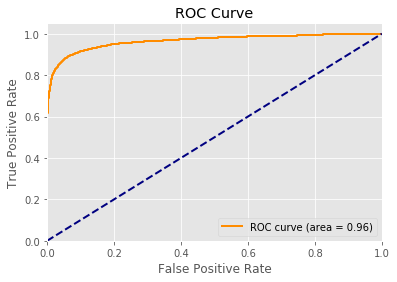

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

y_predict_probabilities = LR_model.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
y_predict_probabilities

array([0.99999979, 0.99999886, 0.99999808, ..., 0.99315563, 0.96514001,
       0.96557873])

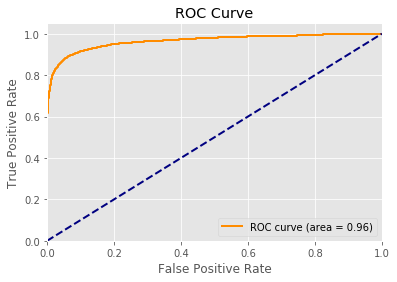

In [12]:

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Extracting accuracy
accuracy = LR_model.score(x_test,y_test)
accuracy

0.9375216938562999

In [11]:
# Converting accuracy to error
error = 1-accuracy
error

0.06247830614370009